In [25]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

from pathlib import Path
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import sys
sys.path.append('../scripts')
from get_srr_metadata import get_sra_info


In [36]:
repseq_dir = Path('/mnt/data2/planter_outputs/repseq')

def count_lines(file_path):
    with open(file_path, 'r') as file:
        return sum(1 for _ in file)

repseq_counts = {}
for updated_reps in repseq_dir.glob('*/updated_reps.txt'):
    repseq_counts[updated_reps.parent.name] = count_lines(updated_reps)

repseq_counts_df = (
    pd.DataFrame(list(repseq_counts.items()), columns=['sample', 'repseq_count'])
        .sort_values(by='repseq_count')
        .assign(
            added=lambda x: x['repseq_count'].diff(),
            sample=lambda df: df['sample'].str.split('_').str[1]
        )
)
repseq_counts_df.head()

,sample,repseq_count,added
71,ERR9123871,16588,NaN
22,ERR9123872,17111,523.0
14,ERR9123874,17640,529.0
12,ERR9123875,18014,374.0
44,ERR9123876,18244,230.0


# Read in the cluster TSV

In [42]:
cluster_tsv = Path('/mnt/data2/planter_outputs/repseq/update_SRR8859648/newClusterDB.tsv')
clusters = pd.read_csv(cluster_tsv, delimiter='\t', header=None)

In [49]:
clusters.shape
clusters[0].unique().shape
clusters[1].unique().shape

(194371, 2)

(160682,)

(194370,)

In [45]:
clusters.groupby(0).size().sort_values(ascending=False)

0
v1_DLS_a89447817bd72bee76a7c6d80024299e5fcdbca460231818912e36cd452a3545.p1    48
v1_DLS_f901beedca93288c7882f2f778acf372bb7eae09b58a9fc989adf75b6f9f2844.p1    26
v1_DLS_3c6cbf8edcf2f6560ac4d803c3d7a09d31d1b69f132c41feed033b88901cafca.p1    25
v1_DLS_33d96989c2d450f33ebe09551d9c88e2a7c11395f77c411b07a8b0f93a33b034.p2    22
v1_DLS_7a2fbd7865ddbcf9de48d864e83cbb28bce568eafe09f6b7bfc3b79e1d5bd3ea.p1    21
                                                                              ..
v1_DLS_5bffc226d8a505812dd2a57db0abd424dcc752d8dd5d593964a818b4d56906cd.p2     1
v1_DLS_5bffcc5ad2c8336c8b0f80302e63744cef62ff6afbc89752b9784511bc3e35ff.p1     1
v1_DLS_5bffd1cbf8314430ea1fb4241368ff239061b9c9fd64242871f311cfd1988016.p1     1
v1_DLS_5c0038791d4f9efe505c924bf5e3e560cf9b4fba97e6345ed165b76d378bda89.p1     1
v1_DLS_5bfda6f548e1b8befbff673026d3a47e212e53bc9af0be8c72f8e0f052c1f4dd.p1     1
Length: 160682, dtype: int64

<Figure size 1000x600 with 0 Axes>

<Axes: xlabel='sample', ylabel='repseq_count'>

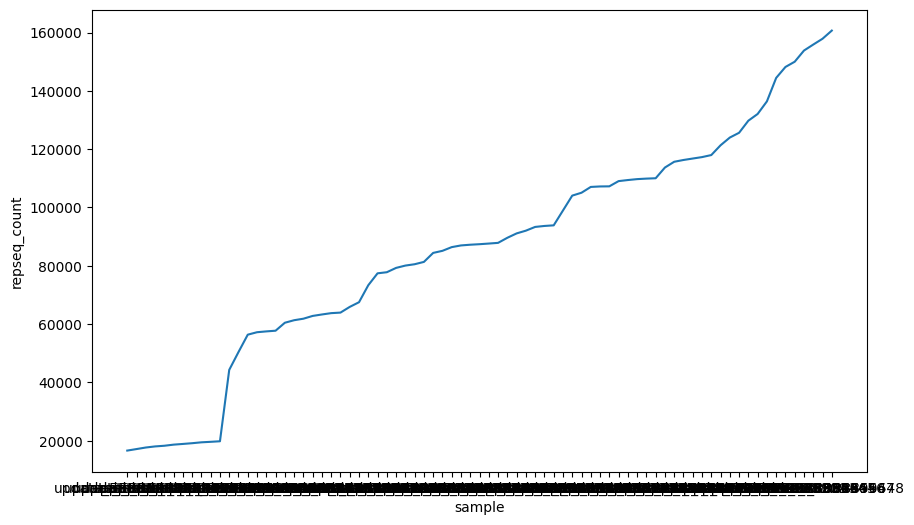

In [24]:
# Plot the repseq_count and diff
plt.figure(figsize=(10, 6))
sns.lineplot(x='sample', y='repseq_count', data=repseq_counts_df)
plt.show()


In [27]:
get_sra_info('ERR9123876')['organism']

'Silene latifolia subsp. alba'